In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [4]:
df.shape

(3401012, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [8]:
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)

,number_of_strikes,center_point_geom
date,,
2018-08-29,1070457,POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...
2018-08-17,969774,POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...
2018-08-28,917199,POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...
2018-08-27,824589,POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...
2018-08-30,802170,POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...
2018-08-19,786225,POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...
2018-08-18,741180,POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...
2018-08-16,734475,POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...
2018-08-31,723624,POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...


In [9]:
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [10]:
df.groupby(['month']).sum(numeric_only=True).reset_index().head(10)

,month,number_of_strikes
0,1,860045
1,2,2071315
2,3,854168
3,4,1524339
4,5,4166726
5,6,6445083
6,7,8320400
7,8,15525255
8,9,3018336
9,10,1093962


In [12]:
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


In [18]:
df_by_month = df.groupby(['month','month_txt']).sum(numeric_only=True).sort_values('month', ascending=True).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


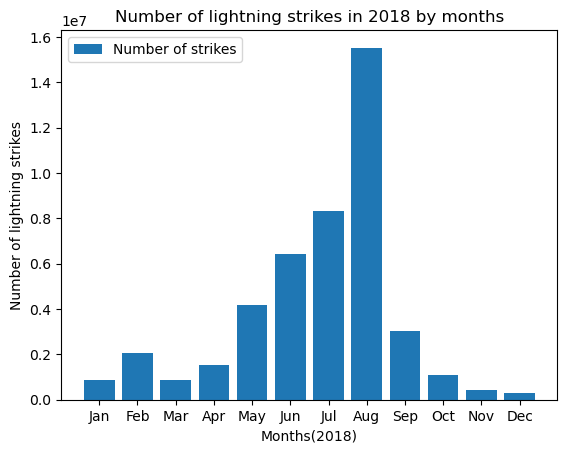

In [19]:
plt.bar(x = df_by_month['month_txt'], height = df_by_month['number_of_strikes'],label='Number of strikes')
plt.plot()

plt.xlabel('Months(2018)')
plt.ylabel('Number of lightning strikes')
plt.title('Number of lightning strikes in 2018 by months')
plt.legend()
plt.show()

New analysis

In [60]:
df = pd.read_csv('Unicorn_Companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [61]:
df.size

10740

In [62]:
df.shape

(1074, 10)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [64]:
df.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [65]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14192\2593295292.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [67]:
df['Year Joined'] = df['Date Joined'].dt.year
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019


In [68]:
companies_sampled = df.sample(n=50, random_state=42)
companies_sampled

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017
237,Webflow,$4B,2021-01-13,Internet software & services,San Francisco,United States,North America,2012,$335M,"Accel, Silversmith Capital Partners, capitalG",2021
475,Gousto,$2B,2020-11-03,"Supply chain, logistics, & delivery",London,United Kingdom,Europe,2012,$311M,"MMC Ventures, BGF Ventures, Unilever Ventures",2020
578,Misfits Market,$2B,2021-04-21,E-commerce & direct-to-consumer,Pennsauken,United States,North America,2018,$527M,"Accel, D1 Capita Partners, Greenoaks Capital M...",2021
462,Hibob,$2B,2021-10-12,Internet software & services,Tel Aviv,Israel,Asia,2015,$274M,"Bessemer Venture Partners, Eight Roads Venture...",2021
978,News Break,$1B,2021-01-07,Internet software & services,Mountain View,United States,North America,2015,$151M,"IDG Capital, Francisco Partners, ZhenFund",2021


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
 10  Year Joined       1074 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(8)
memory usage: 88.2+ KB


In [70]:
companies_sampled['Years to Uni'] = companies_sampled['Year Joined'] - companies_sampled['Year Founded']
companies_sampled.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years to Uni
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5


In [71]:
grouped = companies_sampled[['Industry', 'Years to Uni']].groupby(['Industry']).max().sort_values('Years to Uni',ascending=True)
grouped

,Years to Uni
Industry,
Consumer & retail,1
Auto & transportation,2
Artificial intelligence,5
Data management & analytics,8
Mobile & telecommunications,9
"Supply chain, logistics, & delivery",12
Internet software & services,13
Other,15
E-commerce & direct-to-consumer,18


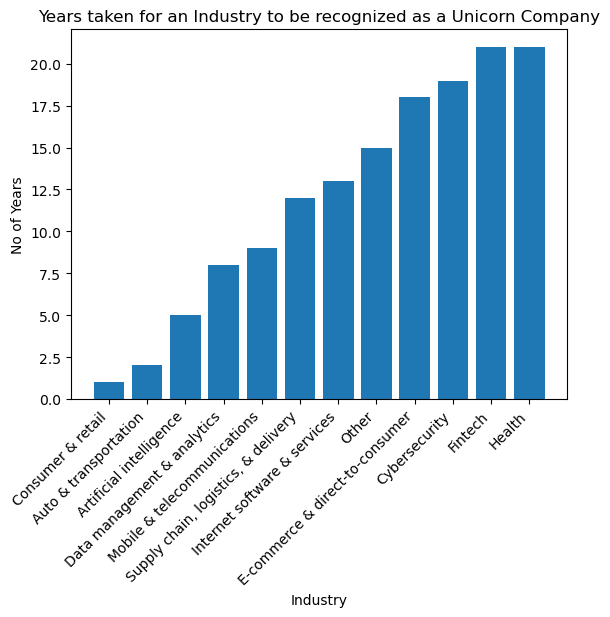

In [72]:
plt.bar(x = grouped.index, height = grouped['Years to Uni'])
plt.plot()

plt.xlabel('Industry')
plt.ylabel('No of Years')
plt.title('Years taken for an Industry to be recognized as a Unicorn Company')

plt.xticks(rotation=45, ha='right')
plt.show()

In [73]:
companies_sampled['Valuation_billions'] = companies_sampled['Valuation'].str.replace('$','')
companies_sampled['Valuation_billions'] = companies_sampled['Valuation_billions'].str.replace('B','')
companies_sampled['Valuation_billions'] = companies_sampled['Valuation_billions'].astype('int')
companies_sampled

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years to Uni,Valuation_billions
542,Aiven,$2B,2021-10-18,Internet software & services,Helsinki,Finland,Europe,2016,$210M,"Institutional Venture Partners, Atomico, Early...",2021,5,2
370,Jusfoun Big Data,$2B,2018-07-09,Data management & analytics,Beijing,China,Asia,2010,$137M,"Boxin Capital, DT Capital Partners, IDG Capital",2018,8,2
307,Innovaccer,$3B,2021-02-19,Health,San Francisco,United States,North America,2014,$379M,"M12, WestBridge Capital, Lightspeed Venture Pa...",2021,7,3
493,Algolia,$2B,2021-07-28,Internet software & services,San Francisco,United States,North America,2012,$334M,"Accel, Alven Capital, Storm Ventures",2021,9,2
350,SouChe Holdings,$3B,2017-11-01,E-commerce & direct-to-consumer,Hangzhou,China,Asia,2012,$1B,"Morningside Ventures, Warburg Pincus, CreditEa...",2017,5,3
237,Webflow,$4B,2021-01-13,Internet software & services,San Francisco,United States,North America,2012,$335M,"Accel, Silversmith Capital Partners, capitalG",2021,9,4
475,Gousto,$2B,2020-11-03,"Supply chain, logistics, & delivery",London,United Kingdom,Europe,2012,$311M,"MMC Ventures, BGF Ventures, Unilever Ventures",2020,8,2
578,Misfits Market,$2B,2021-04-21,E-commerce & direct-to-consumer,Pennsauken,United States,North America,2018,$527M,"Accel, D1 Capita Partners, Greenoaks Capital M...",2021,3,2
462,Hibob,$2B,2021-10-12,Internet software & services,Tel Aviv,Israel,Asia,2015,$274M,"Bessemer Venture Partners, Eight Roads Venture...",2021,6,2
978,News Break,$1B,2021-01-07,Internet software & services,Mountain View,United States,North America,2015,$151M,"IDG Capital, Francisco Partners, ZhenFund",2021,6,1


In [74]:
companies_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 542 to 342
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Company             50 non-null     object        
 1   Valuation           50 non-null     object        
 2   Date Joined         50 non-null     datetime64[ns]
 3   Industry            50 non-null     object        
 4   City                50 non-null     object        
 5   Country/Region      50 non-null     object        
 6   Continent           50 non-null     object        
 7   Year Founded        50 non-null     int64         
 8   Funding             50 non-null     object        
 9   Select Investors    50 non-null     object        
 10  Year Joined         50 non-null     int32         
 11  Years to Uni        50 non-null     int64         
 12  Valuation_billions  50 non-null     int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
me

In [75]:
grouped_valuation = companies_sampled[['Industry','Valuation_billions']].groupby(['Industry']).max().sort_values('Valuation_billions', ascending=True)

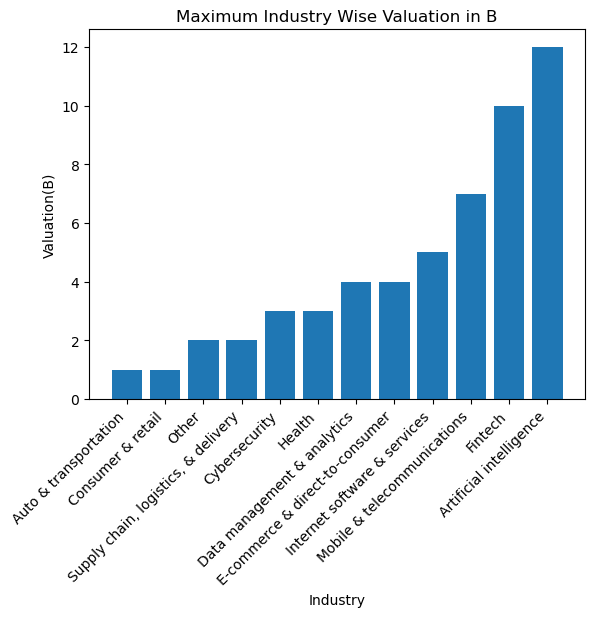

In [76]:
plt.bar(x=grouped_valuation.index, height=grouped_valuation['Valuation_billions'])
plt.plot()

plt.xlabel('Industry')
plt.ylabel('Valuation(B)')
plt.title('Maximum Industry Wise Valuation in B')

plt.xticks(rotation=45, ha='right')
plt.show()

New analysis

In [86]:
df = pd.read_csv('eda_manipulate_date_strings_with_python.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [87]:
df.shape

(10479003, 3)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [89]:
df['date'] = pd.to_datetime(df['date'])

In [90]:
df['week'] = df['date'].dt.strftime('%Y-W%V')
df['month'] = df['date'].dt.strftime('%Y-%m')
df['quarter'] = df['date'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['year'] = df['date'].dt.strftime('%Y')

In [91]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,month,quarter,year
0,2016-08-05,16,POINT(-101.5 24.7),2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-W31,2016-08,2016-Q3,2016


In [92]:
df_by_week_2018 = df[df['year']=='2018'].groupby(['week']).sum(numeric_only=True).reset_index()
df_by_week_2018.head()

,week,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


In [93]:
df_by_week_2018.index = df_by_week_2018.index+1

In [94]:
df_by_week_2018.head(10)

,week,number_of_strikes
1,2018-W01,34843
2,2018-W02,353425
3,2018-W03,37132
4,2018-W04,412772
5,2018-W05,34972
6,2018-W06,568417
7,2018-W07,60847
8,2018-W08,1347198
9,2018-W09,94082
10,2018-W10,196358


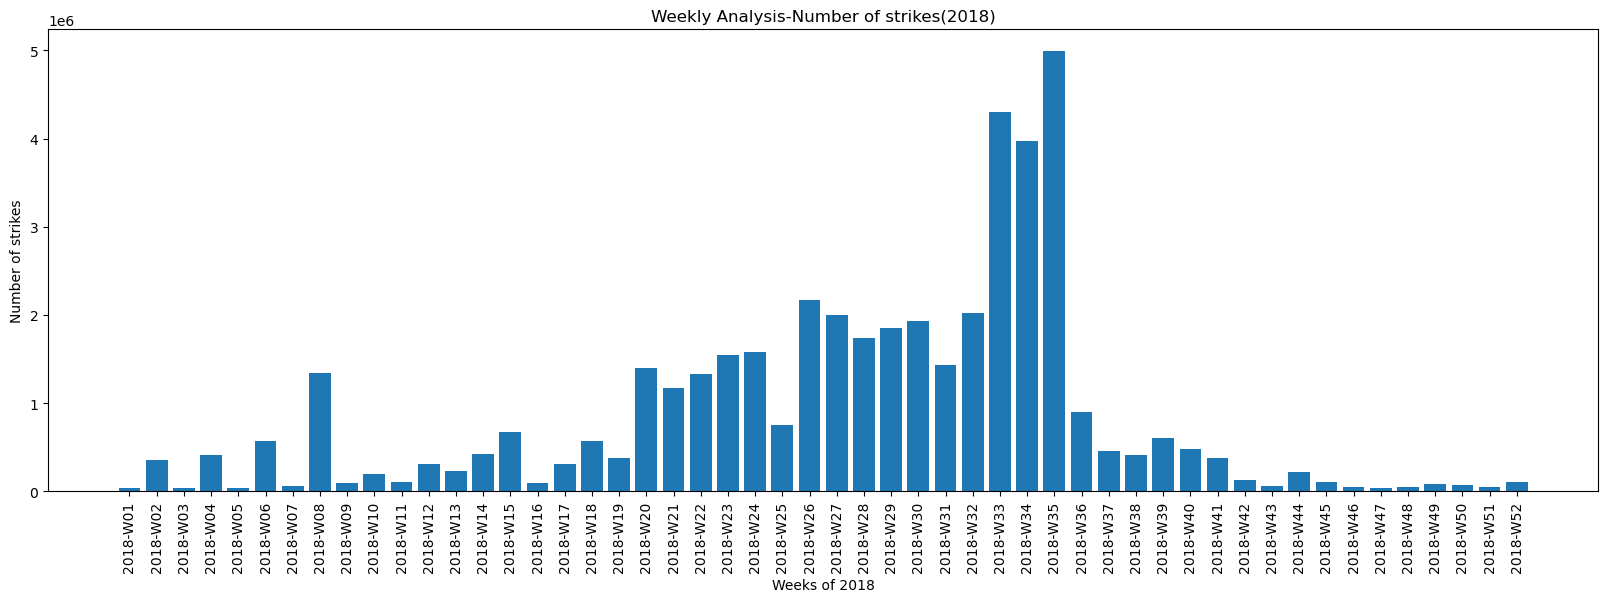

In [100]:
plt.figure(figsize=(20,6))
plt.bar(x=df_by_week_2018['week'], height = df_by_week_2018['number_of_strikes'])
plt.plot()

plt.xlabel('Weeks of 2018')
plt.ylabel('Number of strikes')
plt.title('Weekly Analysis-Number of strikes(2018)')

plt.xticks(rotation=90, ha='center')
plt.show()

In [104]:
df_by_quarter = df.groupby(['quarter']).sum(numeric_only=True).reset_index()

In [108]:
df_by_quarter['Number_of_strikes_altered'] = df_by_quarter['number_of_strikes'].divide(1000000).round(1).astype(str)+'M'
df_by_quarter

,quarter,number_of_strikes,Number_of_strikes_altered
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M
5,2017-Q2,13548585,13.5M
6,2017-Q3,17277461,17.3M
7,2017-Q4,1824870,1.8M
8,2018-Q1,3785528,3.8M
9,2018-Q2,12136148,12.1M


In [106]:
def add_labels(x,y,label):
    for i in range(len(x)):
        plt.text(x[i],y[i],label[i], ha='center', va='bottom')

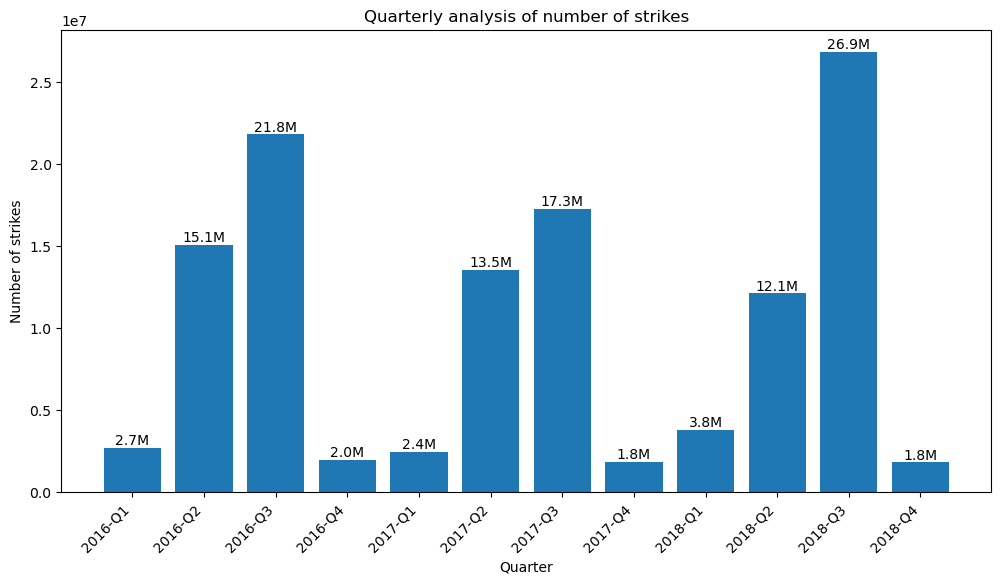

In [110]:
plt.figure(figsize=(12,6))
plt.bar(x = df_by_quarter['quarter'], height=df_by_quarter['number_of_strikes'])
plt.plot()
add_labels(df_by_quarter['quarter'],df_by_quarter['number_of_strikes'],df_by_quarter['Number_of_strikes_altered'])

plt.xlabel('Quarter')
plt.ylabel('Number of strikes')
plt.title('Quarterly analysis of number of strikes')

plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [111]:
df_by_quarter['quarter_number'] = df_by_quarter['quarter'].str[-2:]
df_by_quarter

,quarter,number_of_strikes,Number_of_strikes_altered,quarter_number
0,2016-Q1,2683798,2.7M,Q1
1,2016-Q2,15084857,15.1M,Q2
2,2016-Q3,21843820,21.8M,Q3
3,2016-Q4,1969754,2.0M,Q4
4,2017-Q1,2444279,2.4M,Q1
5,2017-Q2,13548585,13.5M,Q2
6,2017-Q3,17277461,17.3M,Q3
7,2017-Q4,1824870,1.8M,Q4
8,2018-Q1,3785528,3.8M,Q1
9,2018-Q2,12136148,12.1M,Q2


In [112]:
df_by_quarter['year'] = df_by_quarter['quarter'].str[:4]
df_by_quarter

,quarter,number_of_strikes,Number_of_strikes_altered,quarter_number,year
0,2016-Q1,2683798,2.7M,Q1,2016
1,2016-Q2,15084857,15.1M,Q2,2016
2,2016-Q3,21843820,21.8M,Q3,2016
3,2016-Q4,1969754,2.0M,Q4,2016
4,2017-Q1,2444279,2.4M,Q1,2017
5,2017-Q2,13548585,13.5M,Q2,2017
6,2017-Q3,17277461,17.3M,Q3,2017
7,2017-Q4,1824870,1.8M,Q4,2017
8,2018-Q1,3785528,3.8M,Q1,2018
9,2018-Q2,12136148,12.1M,Q2,2018


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

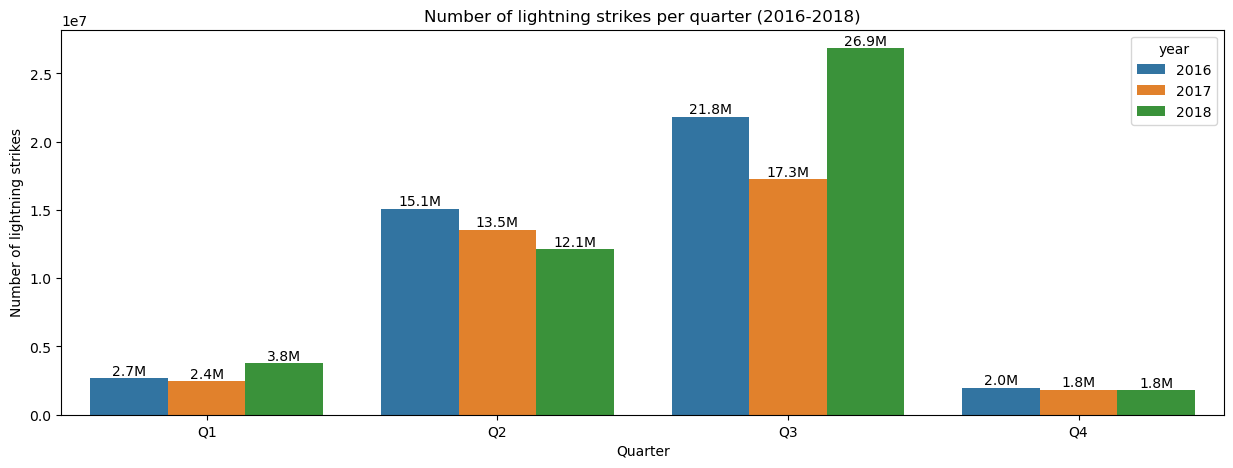

In [134]:
plt.figure(figsize=(15,5))
p=sns.barplot(data = df_by_quarter, x='quarter_number', y='number_of_strikes', hue='year')
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000,1))+'M',
              (b.get_x()+b.get_width()/2,b.get_height()),
               ha = 'center', va='bottom',
               xytext = (0,0),
               textcoords='offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()

New analysis

In [3]:
df = pd.read_csv('eda_structuring_with_python_dataset1.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [4]:
df.shape

(3401012, 3)

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [7]:
df.isnull().sum()

date                 0
number_of_strikes    0
center_point_geom    0
dtype: int64

In [8]:
df.drop_duplicates().shape

(3401012, 3)

In [9]:
df.sort_values('number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


In [10]:
# Identify the locations that appear most in the dataset.
# Locations with most days with at least one lightning strike
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.5 22.9)     107
POINT(-82.7 22.9)     107
POINT(-82.5 22.8)     106
                     ... 
POINT(-119.3 35.1)      1
POINT(-119.3 35)        1
POINT(-119.6 35.6)      1
POINT(-119.4 35.6)      1
POINT(-58.5 45.3)       1
Name: count, Length: 170855, dtype: int64

In [17]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index().style.background_gradient()

,unique_values,count
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


In [21]:
df['week'] = df['date'].dt.isocalendar().week
df['weekday'] = df['date'].dt.day_name()

In [22]:
df.head(10)

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday
5,2018-01-03,119,POINT(-78 28),1,Wednesday
6,2018-01-03,35,POINT(-79.3 28),1,Wednesday
7,2018-01-03,60,POINT(-79.1 28),1,Wednesday
8,2018-01-03,41,POINT(-78.7 28),1,Wednesday
9,2018-01-03,119,POINT(-78.6 28),1,Wednesday


In [24]:
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


In [25]:
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Lightning distribution per week day(2018)')

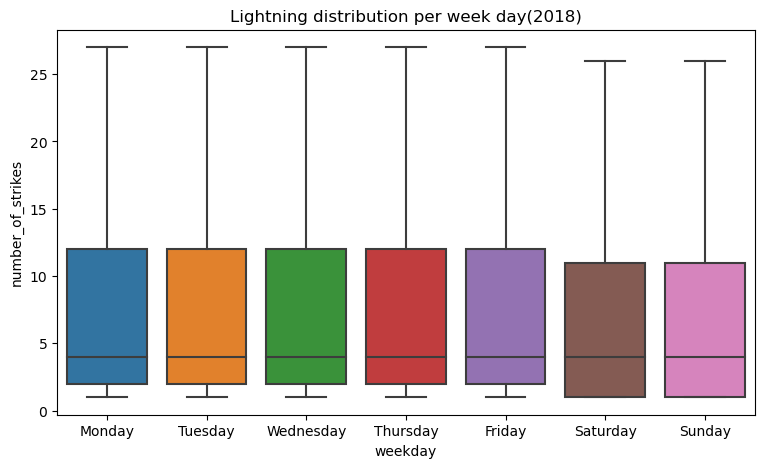

In [31]:
# Create boxplots of strike counts for each day of week.
plt.figure(figsize=(9,5))
b = sns.boxplot(data = df, x='weekday',
            y='number_of_strikes',
            order=weekday_order,
           showfliers=False)
b.set_title('Lightning distribution per week day(2018)')

In [34]:
df['month'] = df.date.dt.month
df['month_name'] = df.date.dt.month_name()
df.head(10)

,date,number_of_strikes,center_point_geom,week,weekday,month,month_name
0,2018-01-03,194,POINT(-75 27),1,Wednesday,1,January
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday,1,January
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday,1,January
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday,1,January
4,2018-01-03,92,POINT(-79 28),1,Wednesday,1,January
5,2018-01-03,119,POINT(-78 28),1,Wednesday,1,January
6,2018-01-03,35,POINT(-79.3 28),1,Wednesday,1,January
7,2018-01-03,60,POINT(-79.1 28),1,Wednesday,1,January
8,2018-01-03,41,POINT(-78.7 28),1,Wednesday,1,January
9,2018-01-03,119,POINT(-78.6 28),1,Wednesday,1,January


In [37]:
df[['month_name','number_of_strikes']].groupby(['month_name']).sum()

,number_of_strikes
month_name,
April,1524339
August,15525255
December,312097
February,2071315
January,860045
July,8320400
June,6445083
March,854168
May,4166726


In [43]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['month_name'] = pd.Categorical(df.month_name,categories=month_order,ordered=True)

df[['month_name','number_of_strikes']].groupby(['month_name']).sum()

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_19372\4108739708.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['month_name','number_of_strikes']].groupby(['month_name']).sum()


,number_of_strikes
month_name,
January,860045
February,0
March,854168
April,1524339
May,4166726
June,6445083
July,8320400
August,15525255
September,3018336


In [42]:
df.month_name.unique()

['January', NaN, 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['January' < 'Febrauary' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

In [44]:
df[df['month_name']=='February']

,date,number_of_strikes,center_point_geom,week,weekday,month,month_name


In [45]:
df2 = pd.read_csv('eda_structuring_with_python_dataset2.csv')
df2.head(10)

,date,number_of_strikes,center_point_geom
0,2016-01-04,55,POINT(-83.2 21.1)
1,2016-01-04,33,POINT(-83.1 21.1)
2,2016-01-05,46,POINT(-77.5 22.1)
3,2016-01-05,28,POINT(-76.8 22.3)
4,2016-01-05,28,POINT(-77 22.1)
5,2016-01-05,30,POINT(-76.7 22.3)
6,2016-01-05,34,POINT(-76.8 22.4)
7,2016-01-06,31,POINT(-74.2 25.9)
8,2016-01-06,24,POINT(-76 22.9)
9,2016-01-06,25,POINT(-75.3 22.7)


In [52]:
df2.date = pd.to_datetime(df2.date)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7077991 entries, 0 to 7077990
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 162.0+ MB


In [53]:
union_df = pd.concat([df.drop(['week','weekday','month','month_name'], axis=1),df2], ignore_index=True)
union_df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [54]:
union_df['year'] = union_df['date'].dt.year
union_df['month'] = union_df['date'].dt.month
union_df['month_txt'] = union_df['date'].dt.month_name()
union_df.head(10)

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January
5,2018-01-03,119,POINT(-78 28),2018,1,January
6,2018-01-03,35,POINT(-79.3 28),2018,1,January
7,2018-01-03,60,POINT(-79.1 28),2018,1,January
8,2018-01-03,41,POINT(-78.7 28),2018,1,January
9,2018-01-03,119,POINT(-78.6 28),2018,1,January


In [55]:
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,44600989


In [68]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
number_of_strikes = pd.NamedAgg(column='number_of_strikes', aggfunc=sum)).reset_index()
lightning_by_month

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_19372\1482266940.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  lightning_by_month = union_df.groupby(['month_txt','year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,1524339
3,August,2016,7250442
4,August,2017,6021702
5,August,2018,15525255
6,December,2016,316450
7,December,2017,294958
8,December,2018,312097
9,February,2016,312676


In [71]:
lightning_by_year = union_df.groupby(['year']).agg(
year_strikes = pd.NamedAgg(column = 'number_of_strikes',aggfunc=sum)).reset_index()
lightning_by_year

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_19372\2770626256.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,44600989


In [72]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year, on='year')
percentage_lightning

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,August,2016,7250442,41582229
2,December,2016,316450,41582229
3,February,2016,312676,41582229
4,January,2016,313595,41582229
5,July,2016,10661475,41582229
6,June,2016,6647930,41582229
7,March,2016,2057527,41582229
8,May,2016,5800500,41582229
9,November,2016,367853,41582229


In [74]:
percentage_lightning['percentage_lightning_per_month'] = round((percentage_lightning.number_of_strikes/percentage_lightning.year_strikes)*100,2)
percentage_lightning

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.34
1,August,2016,7250442,41582229,17.44
2,December,2016,316450,41582229,0.76
3,February,2016,312676,41582229,0.75
4,January,2016,313595,41582229,0.75
5,July,2016,10661475,41582229,25.64
6,June,2016,6647930,41582229,15.99
7,March,2016,2057527,41582229,4.95
8,May,2016,5800500,41582229,13.95
9,November,2016,367853,41582229,0.88


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, '% of lightning strikes each Month (2016-2018)')

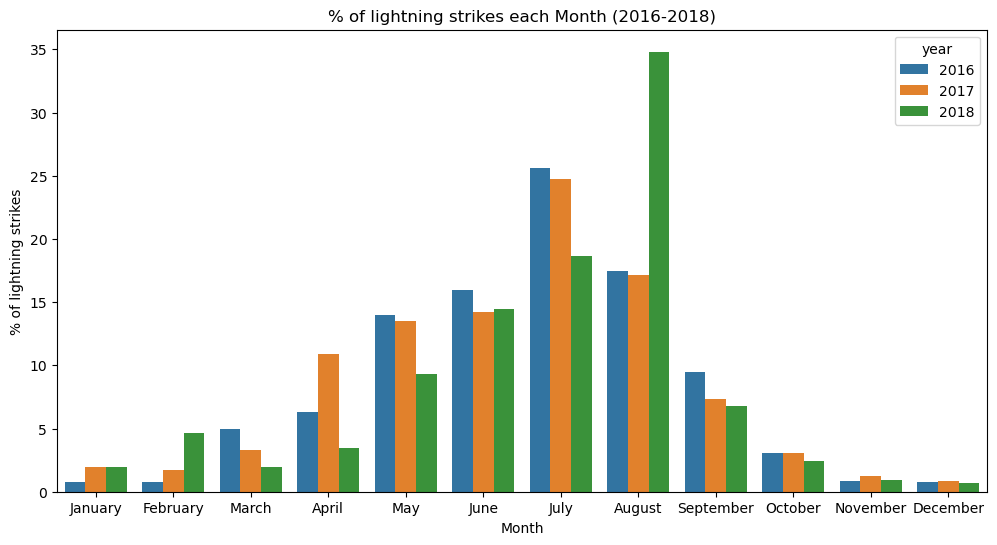

In [76]:
plt.figure(figsize=(12,6))

sns.barplot(data=percentage_lightning,
           x='month_txt',
           y='percentage_lightning_per_month',
           order = month_order,
           hue='year')
plt.xlabel("Month")
plt.ylabel("% of lightning strikes")
plt.title("% of lightning strikes each Month (2016-2018)")

New analysis

In [3]:
df = pd.read_csv('Unicorn_Companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [4]:
df.shape

(1074, 10)

In [5]:
# Check for duplicates.
df.drop_duplicates(inplace=False).shape # non duplicates

(1074, 10)

In [6]:
# Display the data types of the columns.
df.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [7]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.
df.sort_values('Year Founded', ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


In [8]:
# Determine the number of companies founded each year

(df[['Year Founded','Company']]
.groupby(['Year Founded'])
.count().sort_values('Company', ascending=False)
.reset_index())

,Year Founded,Company
0,2015,155
1,2016,110
2,2014,109
3,2012,95
4,2013,87
5,2011,82
6,2017,74
7,2018,61
8,2019,45
9,2010,40


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


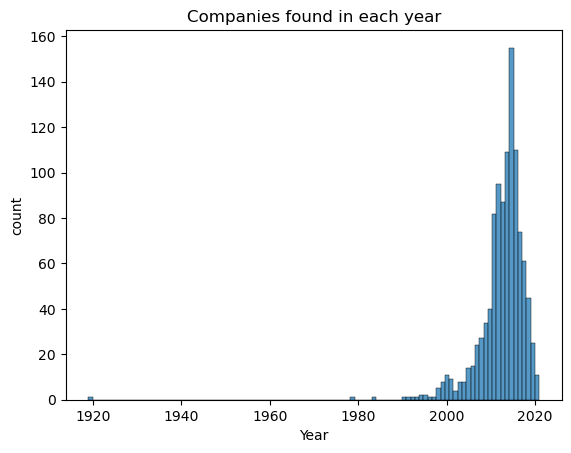

In [9]:
# Plot a histogram of the Year Founded feature.
sns.histplot(data = df, x='Year Founded')

plt.title('Companies found in each year')
plt.xlabel('Year')
plt.ylabel('count')
plt.show()

In [10]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])
df.dtypes

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\1219924513.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [11]:
df['Month Joined'] = df['Date Joined'].dt.month_name()
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


In [12]:
df.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
Month Joined                object
dtype: object

In [14]:
df['Year Joined'] = df['Date Joined'].dt.year
df['Years to Join'] = df['Year Joined'] - df['Year Founded']
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years to Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,2017,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,2012,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,2018,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,2014,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,2011,6
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",January,2018,6
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",May,2019,7
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",December,2014,2
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,December,2017,2
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",February,2019,6


In [15]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable. 
df_2019 = df[df['Year Joined']==2019]
df_2019.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years to Join
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",May,2019,7
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",February,2019,6
14,Chime,$25B,2019-03-05,Fintech,San Francisco,United States,North America,2013,$2B,"Forerunner Ventures, Crosslink Capital, Homebrew",March,2019,6
20,Rapyd,$15B,2019-12-03,Fintech,London,United Kingdom,Europe,2016,$770M,"Target Global, General Catalyst, Durable Capit...",December,2019,3
28,Grammarly,$13B,2019-10-10,Internet software & services,San Francisco,United States,North America,2009,$400M,"General Catalyst, Institutional Venture Partne...",October,2019,10
29,Argo AI,$12B,2019-07-12,Artificial intelligence,Pittsburgh,United States,North America,2016,$4B,"Volkswagen Group, Ford Autonomous Vehicles",July,2019,3
30,Northvolt,$12B,2019-06-12,Other,Stockholm,Sweden,Europe,2016,$4B,"Vattenfall, Volkswagen Group, Goldman Sachs",June,2019,3
31,Faire,$12B,2019-10-30,Artificial intelligence,San Francisco,United States,North America,2017,$1B,"Khosla Ventures, Forerunner Ventures, Sequoia ...",October,2019,2
47,Ripple,$10B,2019-12-20,Fintech,San Francisco,United States,North America,2012,$294M,"IDG Capital, Venture51, Lightspeed Venture Par...",December,2019,7
56,Lalamove,$10B,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,$2B,"MindWorks Ventures, Shunwei Capital Partners, ...",February,2019,6


In [135]:
df_2019['Week Joined'] = df_2019['Date Joined'].dt.strftime('W%V')
df_2019['Quarter Joined'] = df_2019['Date Joined'].dt.to_period('Q').dt.strftime('Q%q')
df_2019.head(10)

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\4014382462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Week Joined'] = df_2019['Date Joined'].dt.strftime('W%V')
C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\4014382462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Quarter Joined'] = df_2019['Date Joined'].dt.to_period('Q').dt.strftime('Q%q')


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years to Join,Week Joined,Quarter Joined
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",May,2019,7,W18,Q2
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",February,2019,6,W06,Q1
14,Chime,$25B,2019-03-05,Fintech,San Francisco,United States,North America,2013,$2B,"Forerunner Ventures, Crosslink Capital, Homebrew",March,2019,6,W10,Q1
20,Rapyd,$15B,2019-12-03,Fintech,London,United Kingdom,Europe,2016,$770M,"Target Global, General Catalyst, Durable Capit...",December,2019,3,W49,Q4
28,Grammarly,$13B,2019-10-10,Internet software & services,San Francisco,United States,North America,2009,$400M,"General Catalyst, Institutional Venture Partne...",October,2019,10,W41,Q4
29,Argo AI,$12B,2019-07-12,Artificial intelligence,Pittsburgh,United States,North America,2016,$4B,"Volkswagen Group, Ford Autonomous Vehicles",July,2019,3,W28,Q3
30,Northvolt,$12B,2019-06-12,Other,Stockholm,Sweden,Europe,2016,$4B,"Vattenfall, Volkswagen Group, Goldman Sachs",June,2019,3,W24,Q2
31,Faire,$12B,2019-10-30,Artificial intelligence,San Francisco,United States,North America,2017,$1B,"Khosla Ventures, Forerunner Ventures, Sequoia ...",October,2019,2,W44,Q4
47,Ripple,$10B,2019-12-20,Fintech,San Francisco,United States,North America,2012,$294M,"IDG Capital, Venture51, Lightspeed Venture Par...",December,2019,7,W51,Q4
56,Lalamove,$10B,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,$2B,"MindWorks Ventures, Shunwei Capital Partners, ...",February,2019,6,W08,Q1


In [22]:
week_2019 = df_2019[['Week Joined','Company']].groupby(['Week Joined']).count().reset_index()
week_2019

,Week Joined,Company
0,W02,1
1,W03,1
2,W04,1
3,W05,2
4,W06,2
5,W07,2
6,W08,2
7,W09,3
8,W10,4
9,W11,1


In [136]:
# combine data for the year 2019 and 2020

df_2020 = df[df['Year Joined']==2020]
df_2020['Week Joined'] = df_2020['Date Joined'].dt.strftime('W%V')
df_2020['Quarter Joined'] = df_2020['Date Joined'].dt.to_period('Q').dt.strftime('Q%q')
df_19_20 = pd.concat([df_2019,df_2020], axis=0)
df_19_20.head(10)

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\1262520248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Week Joined'] = df_2020['Date Joined'].dt.strftime('W%V')
C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\1262520248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Quarter Joined'] = df_2020['Date Joined'].dt.to_period('Q').dt.strftime('Q%q')


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years to Join,Week Joined,Quarter Joined
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",May,2019,7,W18,Q2
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",February,2019,6,W06,Q1
14,Chime,$25B,2019-03-05,Fintech,San Francisco,United States,North America,2013,$2B,"Forerunner Ventures, Crosslink Capital, Homebrew",March,2019,6,W10,Q1
20,Rapyd,$15B,2019-12-03,Fintech,London,United Kingdom,Europe,2016,$770M,"Target Global, General Catalyst, Durable Capit...",December,2019,3,W49,Q4
28,Grammarly,$13B,2019-10-10,Internet software & services,San Francisco,United States,North America,2009,$400M,"General Catalyst, Institutional Venture Partne...",October,2019,10,W41,Q4
29,Argo AI,$12B,2019-07-12,Artificial intelligence,Pittsburgh,United States,North America,2016,$4B,"Volkswagen Group, Ford Autonomous Vehicles",July,2019,3,W28,Q3
30,Northvolt,$12B,2019-06-12,Other,Stockholm,Sweden,Europe,2016,$4B,"Vattenfall, Volkswagen Group, Goldman Sachs",June,2019,3,W24,Q2
31,Faire,$12B,2019-10-30,Artificial intelligence,San Francisco,United States,North America,2017,$1B,"Khosla Ventures, Forerunner Ventures, Sequoia ...",October,2019,2,W44,Q4
47,Ripple,$10B,2019-12-20,Fintech,San Francisco,United States,North America,2012,$294M,"IDG Capital, Venture51, Lightspeed Venture Par...",December,2019,7,W51,Q4
56,Lalamove,$10B,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,$2B,"MindWorks Ventures, Shunwei Capital Partners, ...",February,2019,6,W08,Q1


In [137]:
df_19_20['Month'] = df_19_20['Date Joined'].dt.month

In [138]:
df_19_20['Valuation Billions'] = df_19_20['Valuation'].str.replace('$','')
df_19_20['Valuation Billions'] = df_19_20['Valuation Billions'].str.replace('B','')
df_19_20['Valuation Billions'] = df_19_20['Valuation Billions'].astype('int')
df_19_20.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years to Join,Week Joined,Quarter Joined,Month,Valuation Billions
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",May,2019,7,W18,Q2,5,40
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",February,2019,6,W06,Q1,2,38
14,Chime,$25B,2019-03-05,Fintech,San Francisco,United States,North America,2013,$2B,"Forerunner Ventures, Crosslink Capital, Homebrew",March,2019,6,W10,Q1,3,25
20,Rapyd,$15B,2019-12-03,Fintech,London,United Kingdom,Europe,2016,$770M,"Target Global, General Catalyst, Durable Capit...",December,2019,3,W49,Q4,12,15
28,Grammarly,$13B,2019-10-10,Internet software & services,San Francisco,United States,North America,2009,$400M,"General Catalyst, Institutional Venture Partne...",October,2019,10,W41,Q4,10,13
29,Argo AI,$12B,2019-07-12,Artificial intelligence,Pittsburgh,United States,North America,2016,$4B,"Volkswagen Group, Ford Autonomous Vehicles",July,2019,3,W28,Q3,7,12
30,Northvolt,$12B,2019-06-12,Other,Stockholm,Sweden,Europe,2016,$4B,"Vattenfall, Volkswagen Group, Goldman Sachs",June,2019,3,W24,Q2,6,12
31,Faire,$12B,2019-10-30,Artificial intelligence,San Francisco,United States,North America,2017,$1B,"Khosla Ventures, Forerunner Ventures, Sequoia ...",October,2019,2,W44,Q4,10,12
47,Ripple,$10B,2019-12-20,Fintech,San Francisco,United States,North America,2012,$294M,"IDG Capital, Venture51, Lightspeed Venture Par...",December,2019,7,W51,Q4,12,10
56,Lalamove,$10B,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,$2B,"MindWorks Ventures, Shunwei Capital Partners, ...",February,2019,6,W08,Q1,2,10


In [139]:
df_19_20.groupby(['Year Joined','Month Joined'])\
.mean(numeric_only=True)[['Valuation Billions','Month']]\
.round(2)\
.rename({'Valuation Billions':'Average Valuation'}, axis=1)\
.sort_values(['Year Joined','Month'])\
.reset_index()

,Year Joined,Month Joined,Average Valuation,Month
0,2019,January,4.00,1.0
1,2019,February,7.78,2.0
2,2019,March,4.46,3.0
3,2019,April,2.88,4.0
4,2019,May,5.23,5.0
5,2019,June,3.42,6.0
6,2019,July,4.00,7.0
7,2019,August,2.50,8.0
8,2019,September,3.57,9.0
9,2019,October,4.30,10.0


In [140]:
monthly_avg_val_19_20 = df_19_20.groupby(['Year Joined','Month Joined','Month']).agg(
{'Valuation Billions':'mean'})\
.round(2).sort_values(['Year Joined','Month'], ascending=True)\
.reset_index()
monthly_avg_val_19_20

,Year Joined,Month Joined,Month,Valuation Billions
0,2019,January,1,4.00
1,2019,February,2,7.78
2,2019,March,3,4.46
3,2019,April,4,2.88
4,2019,May,5,5.23
5,2019,June,6,3.42
6,2019,July,7,4.00
7,2019,August,8,2.50
8,2019,September,9,3.57
9,2019,October,10,4.30


In [141]:
df.describe()

,Date Joined,Year Founded,Year Joined,Years to Join
count,1074,1074.000000,1074.000000,1074.000000
mean,2020-05-19 15:35:51.955307264,2012.895717,2019.896648,7.000931
min,2007-07-02 00:00:00,1919.000000,2007.000000,-4.000000
25%,2019-05-20 06:00:00,2011.000000,2019.000000,4.000000
50%,2021-03-29 00:00:00,2014.000000,2021.000000,6.000000
75%,2021-09-19 18:00:00,2016.000000,2021.000000,9.000000
max,2022-04-05 00:00:00,2021.000000,2022.000000,98.000000
std,NaN,5.698573,2.001288,5.329672


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


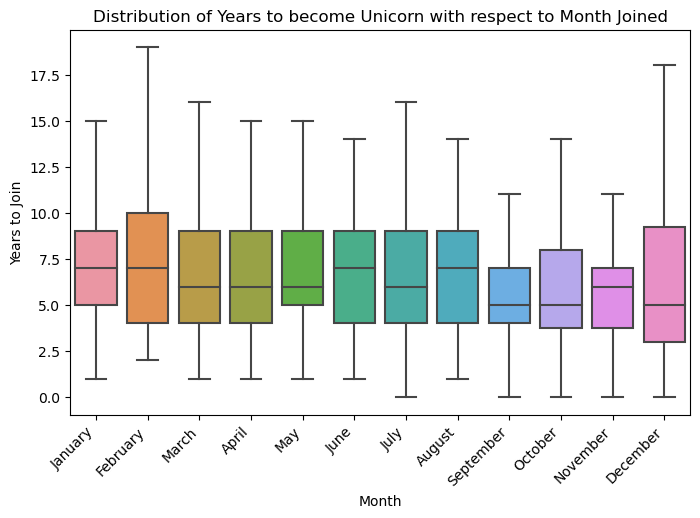

In [142]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(8,5))
sns.boxplot(data = df, x = 'Month Joined', y = 'Years to Join', order=month_order, showfliers=False)

plt.title('Distribution of Years to become Unicorn with respect to Month Joined')
plt.xlabel('Month')
plt.ylabel('Years to Join')

plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\3194338650.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Year Founded', y='Years to Join', ci=None)
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


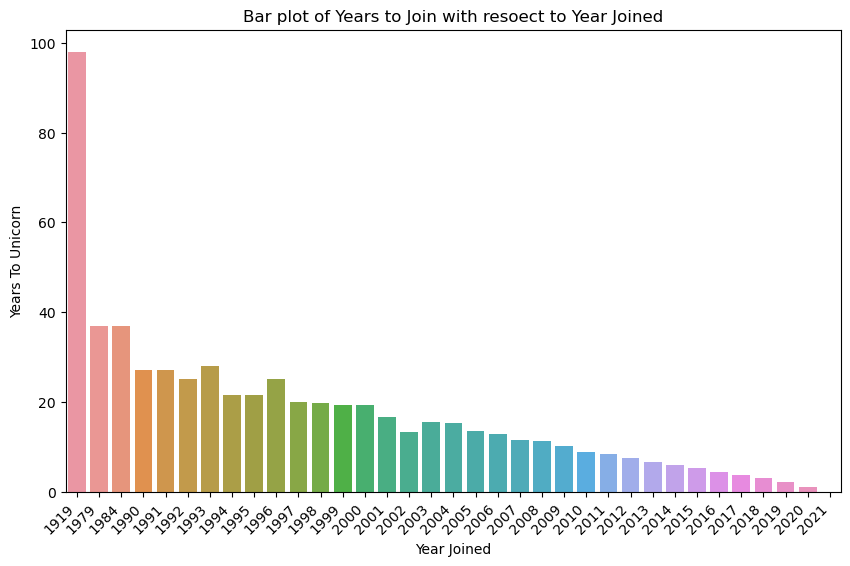

In [143]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Year Founded', y='Years to Join', ci=None)

plt.title('Bar plot of Years to Join with resoect to Year Joined')
plt.xlabel('Year Joined')
plt.ylabel('Years To Unicorn')

plt.xticks(rotation=45, ha='right')
plt.show()

In [144]:
df['Quarter Joined'] = df['Date Joined'].dt.to_period('Q').dt.strftime('Q%q')
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Year Joined,Years to Join,Quarter Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,2017,5,Q2
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,2012,10,Q4
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,2018,10,Q3
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,2014,4,Q1
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,2011,6,Q4
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",January,2018,6,Q1
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",May,2019,7,Q2
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",December,2014,2,Q4
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,December,2017,2,Q4
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",February,2019,6,Q1


In [145]:
quarter_joined = df.groupby(['Quarter Joined']).count()[['Company']].reset_index()
quarter_joined

,Quarter Joined,Company
0,Q1,298
1,Q2,259
2,Q3,249
3,Q4,268


In [146]:
def add_labels(x,y,label):
    for i in range(len(x)):
        plt.text(x[i],y[i],label[i], ha='center', va='bottom')

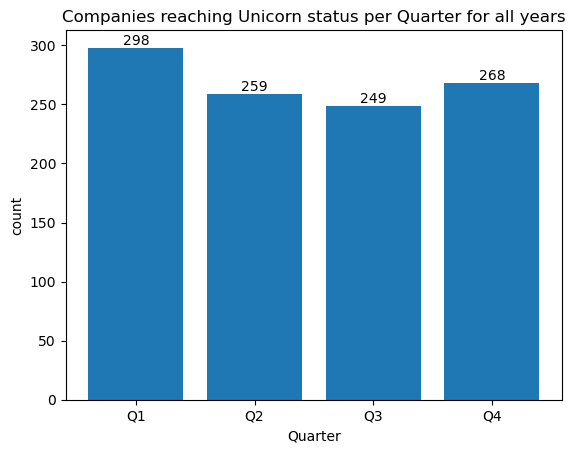

In [147]:
plt.bar(x = quarter_joined['Quarter Joined'], height=quarter_joined['Company'])
add_labels(quarter_joined['Quarter Joined'],
           quarter_joined['Company'],
           quarter_joined['Company'])
plt.title('Companies reaching Unicorn status per Quarter for all years')
plt.xlabel('Quarter')
plt.ylabel('count')
plt.show()

In [149]:
grouped = df_19_20.groupby(['Year Joined','Quarter Joined'], as_index=False)\
.mean(numeric_only=True)[['Year Joined','Quarter Joined','Valuation Billions']]\
.round(2)\
.rename({'Quarter Joined':'Quarter', 'Valuation Billions':'Average Valuation'}, axis=1)
grouped

,Year Joined,Quarter,Average Valuation
0,2019,Q1,5.54
1,2019,Q2,4.00
2,2019,Q3,3.52
3,2019,Q4,4.65
4,2020,Q1,3.44
5,2020,Q2,3.78
6,2020,Q3,3.90
7,2020,Q4,3.70


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

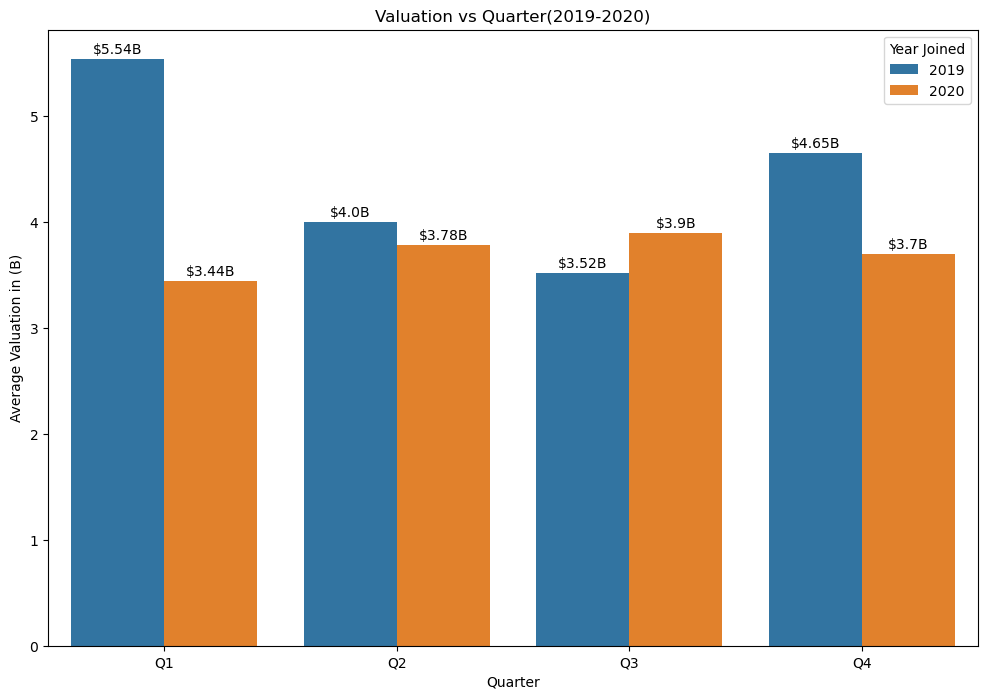

In [150]:
plt.figure(figsize=(12,8))
p = sns.barplot(data=grouped, x='Quarter', y='Average Valuation', hue='Year Joined')
for b in p.patches:
    p.annotate('$'+str(b.get_height())+'B',
              (b.get_x()+b.get_width()/2, b.get_height()),
              xytext=(0,2), ha='center',
              va='bottom',
              textcoords='offset points')
plt.title('Valuation vs Quarter(2019-2020)') 
plt.ylabel('Average Valuation in (B)')
plt.show()

In [151]:
df_19_20.groupby(['Year Joined','Week Joined'])\
.count()[['Company']]

Company
Year Joined Week Joined         
2019        W02                1
            W03                1
            W04                1
            W05                2
            W06                2
...                          ...
2020        W49                4
            W50                2
            W51                6
            W52                4
            W53                1

[93 rows x 1 columns]

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


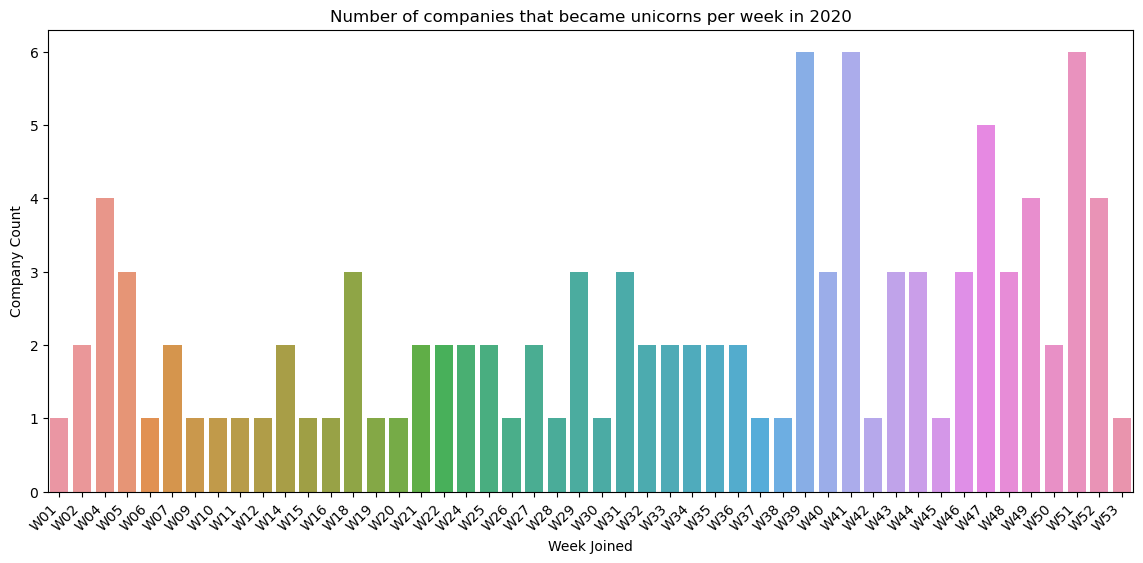

In [165]:
plt.figure(figsize=(14,6))
sns.barplot(data = df_2020.groupby(['Week Joined']).count()[['Company']].reset_index(),
           x = 'Week Joined',
           y = 'Company')

plt.title('Number of companies that became unicorns per week in 2020')
plt.ylabel('Company Count')
plt.xticks(rotation=45,ha='right')
plt.show()


New analysis - Working with missing data

In [166]:
df = pd.read_csv('eda_missing_data_dataset1.csv')
df.head(10)

,date,center_point_geom,longitude,latitude,number_of_strikes
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44
5,2018-08-01,POINT(-81 22.7),-81.0,22.7,36
6,2018-08-01,POINT(-98.4 22.7),-98.4,22.7,110
7,2018-08-01,POINT(-81.1 22.7),-81.1,22.7,48
8,2018-08-01,POINT(-80.9 22.7),-80.9,22.7,71
9,2018-08-01,POINT(-85.7 26.4),-85.7,26.4,29


In [167]:
df.shape

(717530, 5)

In [168]:
df_zip = pd.read_csv('eda_missing_data_dataset2.csv')
df_zip.head(10)

,date,zip_code,city,state,state_code,center_point_geom,number_of_strikes
0,2018-08-08,3281,Weare,New Hampshire,NH,POINT(-71.7 43.1),1
1,2018-08-14,6488,Heritage Village CDP,Connecticut,CT,POINT(-73.2 41.5),3
2,2018-08-16,97759,"Sisters city, Black Butte Ranch CDP",Oregon,OR,POINT(-121.4 44.3),3
3,2018-08-18,6776,New Milford CDP,Connecticut,CT,POINT(-73.4 41.6),48
4,2018-08-08,1077,Southwick,Massachusetts,MA,POINT(-72.8 42),2
5,2018-08-17,92283,Winterhaven CDP,California,CA,POINT(-114.9 33.1),3
6,2018-08-18,5301,"Brattleboro CDP, West Brattleboro CDP",Vermont,VT,POINT(-72.8 42.8),3
7,2018-08-04,97761,Warm Springs CDP,Oregon,OR,POINT(-121.5 44.9),1
8,2018-08-08,1378,Warwick,Massachusetts,MA,POINT(-72.4 42.7),5
9,2018-08-17,3766,Lebanon city,New Hampshire,NH,POINT(-72.2 43.6),6


In [169]:
df_zip.shape

(323700, 7)

In [171]:
# Left-join the two datasets

df_joined = df.merge(df_zip,how = 'left', on=['date','center_point_geom'])
df_joined.head(10)

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44,NaN,NaN,NaN,NaN,NaN
5,2018-08-01,POINT(-81 22.7),-81.0,22.7,36,NaN,NaN,NaN,NaN,NaN
6,2018-08-01,POINT(-98.4 22.7),-98.4,22.7,110,NaN,NaN,NaN,NaN,NaN
7,2018-08-01,POINT(-81.1 22.7),-81.1,22.7,48,NaN,NaN,NaN,NaN,NaN
8,2018-08-01,POINT(-80.9 22.7),-80.9,22.7,71,NaN,NaN,NaN,NaN,NaN
9,2018-08-01,POINT(-85.7 26.4),-85.7,26.4,29,NaN,NaN,NaN,NaN,NaN


In [172]:
df_joined.shape

(717530, 10)

In [173]:
df_joined.describe()

,longitude,latitude,number_of_strikes_x,zip_code,number_of_strikes_y
count,717530.000000,717530.000000,717530.000000,323700.000000,323700.000000
mean,-90.875445,33.328572,21.637081,57931.958996,25.410587
std,13.648429,7.938831,48.029525,22277.327411,57.421824
min,-133.900000,16.600000,1.000000,1002.000000,1.000000
25%,-102.800000,26.900000,3.000000,38260.750000,3.000000
50%,-90.300000,33.200000,6.000000,59212.500000,8.000000
75%,-80.900000,39.400000,21.000000,78642.000000,24.000000
max,-43.800000,51.700000,2211.000000,99402.000000,2211.000000


In [174]:
# Create a new df of just the rows that are missing data
df_null_geo = df_joined[pd.isnull(df_joined.state_code)]
df_null_geo.shape

(393830, 10)

In [175]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717530 entries, 0 to 717529
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 717530 non-null  object 
 1   center_point_geom    717530 non-null  object 
 2   longitude            717530 non-null  float64
 3   latitude             717530 non-null  float64
 4   number_of_strikes_x  717530 non-null  int64  
 5   zip_code             323700 non-null  float64
 6   city                 323700 non-null  object 
 7   state                323700 non-null  object 
 8   state_code           323700 non-null  object 
 9   number_of_strikes_y  323700 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 54.7+ MB


In [176]:
df_null_geo.head(10)

,date,center_point_geom,longitude,latitude,number_of_strikes_x,zip_code,city,state,state_code,number_of_strikes_y
0,2018-08-01,POINT(-81.6 22.6),-81.6,22.6,48,NaN,NaN,NaN,NaN,NaN
1,2018-08-01,POINT(-81.1 22.6),-81.1,22.6,32,NaN,NaN,NaN,NaN,NaN
2,2018-08-01,POINT(-80.9 22.6),-80.9,22.6,118,NaN,NaN,NaN,NaN,NaN
3,2018-08-01,POINT(-80.8 22.6),-80.8,22.6,69,NaN,NaN,NaN,NaN,NaN
4,2018-08-01,POINT(-98.4 22.8),-98.4,22.8,44,NaN,NaN,NaN,NaN,NaN
5,2018-08-01,POINT(-81 22.7),-81.0,22.7,36,NaN,NaN,NaN,NaN,NaN
6,2018-08-01,POINT(-98.4 22.7),-98.4,22.7,110,NaN,NaN,NaN,NaN,NaN
7,2018-08-01,POINT(-81.1 22.7),-81.1,22.7,48,NaN,NaN,NaN,NaN,NaN
8,2018-08-01,POINT(-80.9 22.7),-80.9,22.7,71,NaN,NaN,NaN,NaN,NaN
9,2018-08-01,POINT(-85.7 26.4),-85.7,26.4,29,NaN,NaN,NaN,NaN,NaN


In [183]:
# Create new df of just latitude, longitude, and number of strikes and group by latitude and longitude
top_missing = df_null_geo[['latitude','longitude','number_of_strikes_x']]\
.groupby(['latitude','longitude']).sum()[['number_of_strikes_x']]\
.sort_values('number_of_strikes_x', ascending=False).reset_index()
top_missing.head(10)

,latitude,longitude,number_of_strikes_x
0,22.4,-84.2,3841
1,22.9,-82.9,3184
2,22.4,-84.3,2999
3,22.9,-83.0,2754
4,22.5,-84.1,2746
5,22.5,-84.2,2738
6,22.3,-81.0,2680
7,22.9,-82.4,2652
8,22.9,-82.3,2618
9,22.3,-84.3,2551


In [ ]:
import plotly.express as px

fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],
              lat = 'latitude',
              lon='longitude',
              size='number_of_strikes_x')

fig.update_layout(
    title_text = 'Missing data', # Create a Title
)

fig.show()

It’s a nice geographic visualization, but we really don’t need the global scale. Let’s scale it down to only the geographic area we are interested in - the United States.

In [ ]:
import plotly.express as px

fig = px.scatter_geo(top_missing[top_missing.number_of_strikes_x>=300],
                    lat = 'latitude',
                    lon='longitude',
                    size='number_of_strikes_x')

fig.update_layout(
title_text = 'Missing data',
geo_scope = 'usa')

fig.show()

Outlier Treatment

In [188]:
df = pd.read_csv('eda_outliers_dataset1.csv')
df.head(10)

,year,number_of_strikes
0,2020,15620068
1,2019,209166
2,2018,44600989
3,2017,35095195
4,2016,41582229
5,2015,37894191
6,2014,34919173
7,2013,27600898
8,2012,28807552
9,2011,31392058


In [192]:
def readable_numbers(x):
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-3)
    return s

In [193]:
df['number_of_strikes_readable'] = df['number_of_strikes'].apply(readable_numbers)

In [196]:
df.head(10)

,year,number_of_strikes,number_of_strikes_readable
0,2020,15620068,15.6M
1,2019,209166,209K
2,2018,44600989,44.6M
3,2017,35095195,35.1M
4,2016,41582229,41.6M
5,2015,37894191,37.9M
6,2014,34919173,34.9M
7,2013,27600898,27.6M
8,2012,28807552,28.8M
9,2011,31392058,31.4M


In [197]:
print("Mean:" + readable_numbers(np.mean(df['number_of_strikes'])))
print("Median:" + readable_numbers(np.median(df['number_of_strikes'])))

Mean:26.8M
Median:28.3M


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\815735859.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Yearly number of lightning strikes')

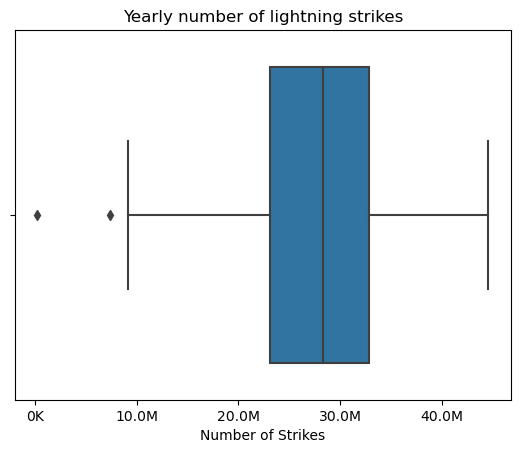

In [203]:
# Create boxplot
box = sns.boxplot(x = df['number_of_strikes'])
g = plt.gca()
box.set_xticklabels([readable_numbers(x) for x in g.get_xticks()])
plt.xlabel('Number of Strikes')
plt.title('Yearly number of lightning strikes')

In [206]:
#iqr and percentile calculation

percentile25 = df['number_of_strikes'].quantile(0.25)
percentile75 = df['number_of_strikes'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [208]:
print(f'Upper Limit: {readable_numbers(upper_limit)}\nLower Limit: {readable_numbers(lower_limit)}')

Upper Limit: 47.4M
Lower Limit: 8.6M


In [205]:
df[df['number_of_strikes']<lower_limit]

,year,number_of_strikes,number_of_strikes_readable
1,2019,209166,209K
33,1987,7378836,7.4M


(array([1985., 1990., 1995., 2000., 2005., 2010., 2015., 2020., 2025.]),
 [Text(1985.0, 0, '1985'),
  Text(1990.0, 0, '1990'),
  Text(1995.0, 0, '1995'),
  Text(2000.0, 0, '2000'),
  Text(2005.0, 0, '2005'),
  Text(2010.0, 0, '2010'),
  Text(2015.0, 0, '2015'),
  Text(2020.0, 0, '2020'),
  Text(2025.0, 0, '2025')])

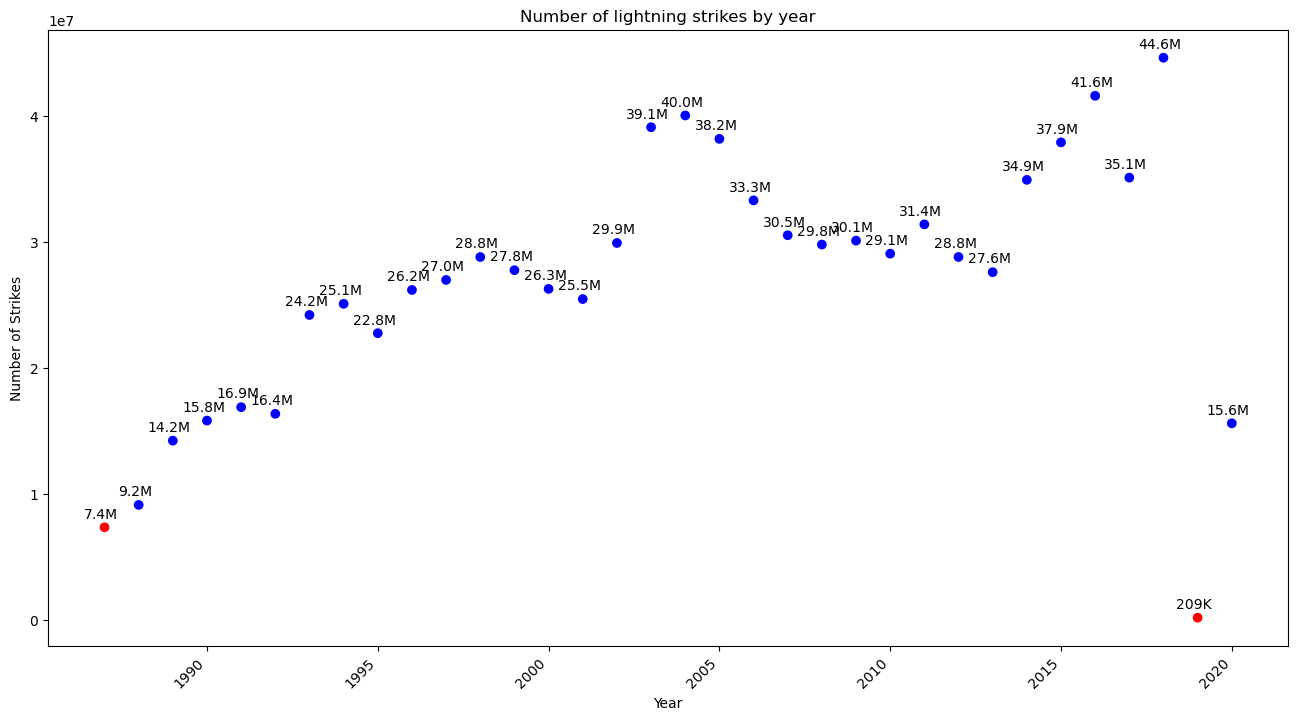

In [231]:
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(x[i]-0.1,y[i]+500000, s=readable_numbers(y[i]), ha='center', va='bottom')

colors = np.where(df['number_of_strikes']<lower_limit,'r','b')
        
fig,ax = plt.subplots(figsize=(16,8))
ax.scatter(df['year'], df['number_of_strikes'], c=colors)
add_labels(df['year'],df['number_of_strikes'])
plt.xlabel('Year')
plt.ylabel('Number of Strikes')
plt.title('Number of lightning strikes by year')


Import data for 2019

In [232]:
df_2019 = pd.read_csv('eda_outliers_dataset2.csv')
df_2019.head()

,date,number_of_strikes,center_point_geom
0,2019-12-01,1,POINT(-79.7 35.3)
1,2019-12-01,1,POINT(-84.7 39.3)
2,2019-12-01,1,POINT(-83.4 38.9)
3,2019-12-01,1,POINT(-71.5 35.2)
4,2019-12-01,1,POINT(-87.8 41.6)


In [234]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54831 entries, 0 to 54830
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               54831 non-null  object
 1   number_of_strikes  54831 non-null  int64 
 2   center_point_geom  54831 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [237]:
df_2019['date'] = pd.to_datetime(df_2019['date'])

df_2019['month'] = df_2019['date'].dt.month
df_2019['month_txt'] = df_2019['date'].dt.month_name().str.slice(stop=3)

df_2019.groupby(['month','month_txt']).sum(numeric_only=True).reset_index()

,month,month_txt,number_of_strikes
0,12,Dec,209166


2019 appears to have data only for the month of December. The likelihood of there not being any lightning from January to November 2019 is ~0. This appears to be a case of missing data. We should probably exclude 2019 from the analysis (for most use cases).

In [240]:
df_1987 = pd.read_csv('eda_outliers_dataset3.csv')

df_1987['date'] = pd.to_datetime(df_1987['date'])

df_1987['month'] = df_1987['date'].dt.month
df_1987['month_txt'] = df_1987['date'].dt.month_name().str.slice(stop=3)

In [241]:
df_1987.groupby(['month','month_txt']).sum(numeric_only=True).reset_index()

,month,month_txt,number_of_strikes
0,1,Jan,23044
1,2,Feb,61020
2,3,Mar,117877
3,4,Apr,157890
4,5,May,700910
5,6,Jun,1064166
6,7,Jul,2077619
7,8,Aug,2001899
8,9,Sep,869833
9,10,Oct,105627


In [242]:
# Create new df that removes outliers
df_without_outliers = df[df['number_of_strikes']>=lower_limit]

print('Mean: '+ readable_numbers(np.mean(df_without_outliers['number_of_strikes'])))
print('Median: '+  readable_numbers(np.median(df_without_outliers['number_of_strikes'])))

Mean: 28.2M
Median: 28.8M


Label Encoding

In [243]:
df = pd.read_csv('eda_label_encoding_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


In [246]:
# Convert `date` column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create new `month` column
df['month'] = df['date'].dt.month_name().str.slice(stop=3)
# Create `year` column by extracting the year info from the datetime object
df['year'] = df['date'].dt.strftime('%Y')


In [247]:
df.head()

,date,number_of_strikes,center_point_geom,month,year
0,2016-08-05,16,POINT(-101.5 24.7),Aug,2016
1,2016-08-05,16,POINT(-85 34.3),Aug,2016
2,2016-08-05,16,POINT(-89 41.4),Aug,2016
3,2016-08-05,16,POINT(-89.8 30.7),Aug,2016
4,2016-08-05,16,POINT(-86.2 37.9),Aug,2016


In [252]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

df_by_month = df.groupby(['year','month']).sum(numeric_only=True).sort_values(['year','month'],ascending=True).reset_index()
df_by_month.head()

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_14640\1466069669.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,year,month,number_of_strikes
0,2016,Jan,313595
1,2016,Feb,312676
2,2016,Mar,2057527
3,2016,Apr,2636427
4,2016,May,5800500


In [253]:
df_by_month['strike_level'] = pd.qcut(df_by_month['number_of_strikes'],4,
                                     labels=['Mild','Scattered','Heavy','Severe'])
df_by_month.head()

,year,month,number_of_strikes,strike_level
0,2016,Jan,313595,Mild
1,2016,Feb,312676,Mild
2,2016,Mar,2057527,Scattered
3,2016,Apr,2636427,Heavy
4,2016,May,5800500,Severe


In [254]:
df_by_month['strike_level_code'] = df_by_month['strike_level'].cat.codes
df_by_month.head()

,year,month,number_of_strikes,strike_level,strike_level_code
0,2016,Jan,313595,Mild,0
1,2016,Feb,312676,Mild,0
2,2016,Mar,2057527,Scattered,1
3,2016,Apr,2636427,Heavy,2
4,2016,May,5800500,Severe,3


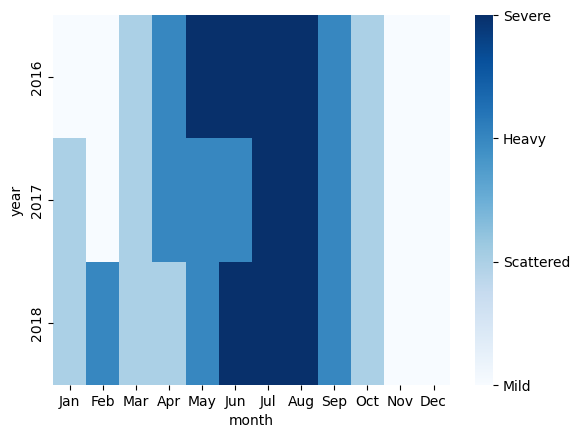

In [259]:
df_by_month_plot = df_by_month.pivot(index='year', columns='month',
                                     values='strike_level_code')

ax = sns.heatmap(df_by_month_plot,cmap='Blues')
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0,1,2,3])
colorbar.set_ticklabels(['Mild', 'Scattered', 'Heavy', 'Severe'])
plt.show()

In [66]:
pd.set_option('display.max_columns',None)

In [68]:
df = pd.read_csv('Modified_Unicorn_Companies.csv')
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,38,2019-02-05,Data management and analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [69]:
df.shape

(1074, 10)

In [70]:
df.dtypes

Company             object
Valuation            int64
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [71]:
# Apply necessary datatype conversions.
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

In [72]:
# Create the column Years To Unicorn.
df['Years to Unicorn'] = df['Date Joined'].dt.year - df['Year Founded']
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6


In [73]:
df['Years to Unicorn'].describe()

count    1074.000000
mean        7.013035
std         5.331842
min        -3.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        98.000000
Name: Years to Unicorn, dtype: float64

In [74]:
# Isolate any rows where `Years To Unicorn` is negative

df[df['Years to Unicorn']<0]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
527,InVision,2,2017-11-01,Internet software & services,New York,United States,North America,2020,$349M,"FirstMark Capital, Tiger Global Management, IC...",-3


An internet search reveals that InVision was founded in 2011. Replace the value at Year Founded with 2011 for InVision's row.

In [75]:
df.loc[df['Company']=='InVision', 'Year Founded'] = 2011

In [76]:
df.iloc[527]

Company                                                      InVision
Valuation                                                           2
Date Joined                                       2017-11-01 00:00:00
Industry                                 Internet software & services
City                                                         New York
Country/Region                                          United States
Continent                                               North America
Year Founded                                                     2011
Funding                                                         $349M
Select Investors    FirstMark Capital, Tiger Global Management, IC...
Years to Unicorn                                                   -3
Name: 527, dtype: object

In [77]:
# Recalculate all values in the `Years To Unicorn` column
df['Years to Unicorn'] = df['Date Joined'].dt.year - df['Year Founded']
df.iloc[527]

Company                                                      InVision
Valuation                                                           2
Date Joined                                       2017-11-01 00:00:00
Industry                                 Internet software & services
City                                                         New York
Country/Region                                          United States
Continent                                               North America
Year Founded                                                     2011
Funding                                                         $349M
Select Investors    FirstMark Capital, Tiger Global Management, IC...
Years to Unicorn                                                    6
Name: 527, dtype: object

In [78]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

In [79]:
not_in_industry = [ind for ind in df['Industry'] if ind not in industry_list]
not_in_industry = set(not_in_industry)
not_in_industry

{'Artificial Intelligence', 'Data management and analytics', 'FinTech'}

In [80]:
not_in_industry = ~df['Industry'].isin(industry_list)
df[not_in_industry]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
9,Databricks,38,2019-02-05,Data management and analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",6
14,Chime,25,2019-03-05,FinTech,San Francisco,United States,North America,2013,$2B,"Forerunner Ventures, Crosslink Capital, Homebrew",6
33,Brex,12,2018-10-05,FinTech,San Francisco,United States,North America,2017,$1B,"DST Global, Ribbit Capital, Greenoaks Capital ...",1
44,Celonis,11,2018-06-26,Data management and analytics,Munich,Germany,Europe,2011,$1B,"Accel, 83North",7
91,Toss,7,2018-12-09,FinTech,Seoul,South Korea,Asia,2013,$844M,"Bessemer Venture Partners, Qualcomm Ventures, ...",5
105,Airwallex,6,2019-03-25,FinTech,Melbourne,Australia,Oceania,2015,$802M,"DST Global, Sequoia Capital China, Tencent Hol...",4
110,FiveTran,6,2020-06-30,Data management and analytics,Oakland,United States,North America,2012,$728M,"Matrix Partners, Andreessen Horowitz, General ...",8
161,Pine Labs,5,2020-01-24,FinTech,Noida,India,Asia,1998,$903M,"Sequoia Capital India, Temasek, PayPal Ventures",22
207,Chainalysis,4,2020-11-23,FinTech,New York,United States,North America,2014,$367M,"Addition, Benhcmark, Accel",6


In [81]:
# Create `replacement_dict`
replacement_dict = {'Artificial Intelligence':'Artificial intelligence',
                   'Data management and analytics':'Data management & analytics',
                   'FinTech':'Fintech'}

df['Industry'].replace(replacement_dict, inplace=True)

In [82]:
df[~df['Industry'].isin(industry_list)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn


In [83]:
# Isolate rows of all companies that have duplicates
df[df.duplicated(subset='Company', keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
385,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,United Kingdom,Europe,2007,$233M,"TSG Consumer Partners, Crowdcube",10
386,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,UnitedKingdom,Europe,2007,$233M,TSG Consumer Partners,10
510,ZocDoc,2,2015-08-20,Health,New York,United States,North America,2007,$374M,"Founders Fund, Khosla Ventures, Goldman Sachs",8
511,ZocDoc,2,2015-08-20,Health,NaN,United States,North America,2007,$374M,Founders Fund,8
1031,SoundHound,1,2018-05-03,Artificial intelligence,Santa Clara,United States,North America,2005,$215M,"Tencent Holdings, Walden Venture Capital, Glob...",13
1032,SoundHound,1,2018-05-03,Other,Santa Clara,United States,North America,2005,$215M,Tencent Holdings,13


In [84]:
df[df['Company'].duplicated(keep=False)]

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn
385,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,United Kingdom,Europe,2007,$233M,"TSG Consumer Partners, Crowdcube",10
386,BrewDog,2,2017-04-10,Consumer & retail,Aberdeen,UnitedKingdom,Europe,2007,$233M,TSG Consumer Partners,10
510,ZocDoc,2,2015-08-20,Health,New York,United States,North America,2007,$374M,"Founders Fund, Khosla Ventures, Goldman Sachs",8
511,ZocDoc,2,2015-08-20,Health,NaN,United States,North America,2007,$374M,Founders Fund,8
1031,SoundHound,1,2018-05-03,Artificial intelligence,Santa Clara,United States,North America,2005,$215M,"Tencent Holdings, Walden Venture Capital, Glob...",13
1032,SoundHound,1,2018-05-03,Other,Santa Clara,United States,North America,2005,$215M,Tencent Holdings,13


In [85]:
df = df.drop_duplicates(subset='Company',keep='first')
df.shape

(1071, 11)

In [86]:
df['High Valuation'] = pd.qcut(df['Valuation'],2,labels=['low','high'])
df

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn,High Valuation
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,high
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,high
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,high
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,high
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,high
...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",5,low
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2,low
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",3,low
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",16,low


For the purposes of this exercise, suppose that the investment group has specified that they want to give more weight to continents with fewer unicorn companies because they believe this could indicate unrealized market potential.

Rank the continents in descending order from the greatest number of unicorn companies to the least.

In [87]:
# Rank the continents by number of unicorn companies

df.groupby(['Continent']).count()[['Company']].sort_values('Company', ascending=False)

,Company
Continent,
North America,586
Asia,310
Europe,143
South America,21
Oceania,8
Africa,3


Now, create a new column called Continent Number that represents the Continent column converted to numeric in the order of their number of unicorn companies, where North America is encoded as 1, through Africa, encoded as 6.

In [88]:
replacement_dict = {'North America':1,
                    'Asia':2, 'Europe':3,
                    'South America':4,
                    'Oceania':5,
                    'Africa':6}
df['Continent Number'] = df['Continent'].replace(replacement_dict)
df

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn,High Valuation,Continent Number
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,high,2
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,high,1
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,high,2
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,high,1
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,high,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,1,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",5,low,2
1070,Zhuan Zhuan,1,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2,low,2
1071,Zihaiguo,1,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",3,low,2
1072,Zopa,1,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",16,low,3


Now, suppose that within a given continent, each company's Country/Region is given equal importance. For analytical purposes, you want to convert the values in this column to numeric without creating a large number of dummy columns. Use label encoding of this nominal categorical variable to create a new column called Country/Region Numeric, wherein each unique Country/Region is assigned its own number.

In [89]:
df['Country/Region Numeric'] = pd.Categorical(df['Country/Region'])
df['Country/Region Numeric'] = df['Country/Region Numeric'].cat.codes

In [90]:
df.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn,High Valuation,Continent Number,Country/Region Numeric
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,high,2,9
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,high,1,44
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,high,2,9
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,high,1,44
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,high,3,38
5,Canva,40,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",6,high,5,1
6,Checkout.com,40,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",7,high,3,43
7,Instacart,39,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2,high,1,44
8,JUUL Labs,38,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2,high,1,44
9,Databricks,38,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",6,high,1,44


In [91]:
d = {'Country':['India','Australia','Germany','Canada','USA'],
     'Values': [10,20,30,40,50]}
new_df = pd.DataFrame(d)

In [92]:
new_df

,Country,Values
0,India,10
1,Australia,20
2,Germany,30
3,Canada,40
4,USA,50


In [93]:
new_df.index = pd.RangeIndex(start=1, stop=1+len(new_df), step=1)

In [94]:
new_df

,Country,Values
1,India,10
2,Australia,20
3,Germany,30
4,Canada,40
5,USA,50


In [101]:
c_order = ['Germany', 'USA', 'Canada', 'India', 'Australia']

new_df['Country'] = pd.Categorical(new_df['Country'],categories=c_order,ordered=True)

In [102]:
new_df['Country Code'] = new_df['Country'].cat.codes

In [103]:
new_df

,Country,Values,Country Code
1,India,10,3
2,Australia,20,4
3,Germany,30,0
4,Canada,40,2
5,USA,50,1


In [113]:
df1 = pd.get_dummies(df['Industry'], dtype=int)
df1

,Artificial intelligence,Auto & transportation,Consumer & retail,Cybersecurity,Data management & analytics,E-commerce & direct-to-consumer,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1070,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1071,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1072,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [114]:
df = pd.concat([df,df1], axis=1)
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years to Unicorn,High Valuation,Continent Number,Country/Region Numeric,Artificial intelligence,Auto & transportation,Consumer & retail,Cybersecurity,Data management & analytics,E-commerce & direct-to-consumer,Edtech,Fintech,Hardware,Health,Internet software & services,Mobile & telecommunications,Other,"Supply chain, logistics, & delivery",Travel
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5,high,2,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,high,1,44,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10,high,2,9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4,high,1,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6,high,3,38,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_csv('eda_structuring_with_python_dataset1.csv')
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom
302758,2018-08-20,2211,POINT(-92.5 35.5)
278383,2018-08-16,2142,POINT(-96.1 36.1)
280830,2018-08-17,2061,POINT(-90.2 36.1)
280453,2018-08-17,2031,POINT(-89.9 35.9)
278382,2018-08-16,1902,POINT(-96.2 36.1)
11517,2018-02-10,1899,POINT(-95.5 28.1)
277506,2018-08-16,1878,POINT(-89.7 31.5)
24906,2018-02-25,1833,POINT(-98.7 28.9)
284320,2018-08-17,1767,POINT(-90.1 36)
24825,2018-02-25,1741,POINT(-98 29)


In [12]:
df['center_point_geom'].value_counts()[:20].rename_axis('location').reset_index()

,location,count
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.5 22.9),107
3,POINT(-82.7 22.9),107
4,POINT(-82.5 22.8),106
5,POINT(-84.2 22.3),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104
